# Set up drive and Import libraries 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read Csv into DataFrame

In [2]:
Path = ''
df = pd.read_csv(Path)
df.shape

(62184, 11)

In [3]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


# Visualize Visualize Visualize 

In [4]:
# Load Statsmodels 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Load Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df.index = df['date']

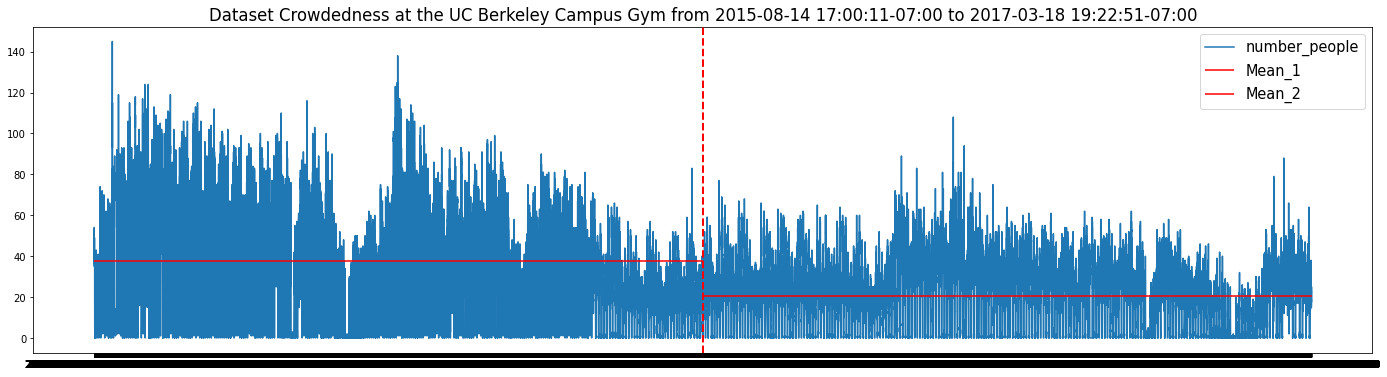

In [8]:
# Plotting the Data
size = len(df)-1
#size = 1_000
x_position = 31092
y1 = 37.467741
y2 = 20.677345
# Define the plot size
plt.figure(figsize=(24,6))

# Plot the data
# Plot the main signal (time, number_people)
plt.plot(df.index[:size], df['number_people'][:size], label = "number_people", zorder=0)
# Plot a vertical line 
plt.axvline(x_position, color='r', linestyle='--', lw=2, zorder=10)
# Plot horizontal lines 
plt.hlines(y1, 0, x_position, colors='r', linestyles='solid', label='Mean_1', zorder=10)
plt.hlines(y2, x_position, size, colors='r', linestyles='solid', label='Mean_2', zorder=10)
plt.legend(loc='best', fontsize=14.5)
plt.title(f"Dataset Crowdedness at the UC Berkeley Campus Gym from {df.index[0]} to {df.index[size]}", fontsize=16.5)
plt.show()

In [ ]:
df[:4].describe().iloc[1][0]

41.5

In [ ]:
size = len(df)-1
offset = 50
x_means = []
y_means = []
total_steps = 90
increment = int(size/total_steps)
x_old = 0

print("Dataset Size :", size)
print("Increment : ", increment)

for x in range(increment, size, increment):
  x_means.append(x)
  y = df[x_old:x].describe().iloc[1][0]
  #print(y)
  y_means.append(y)
  x_old = x

x_means, y_means = np.array(x_means), np.array(y_means)
x_means.shape, y_means.shape, x_means[:5], y_means[:5]

Dataset Size : 62183
Increment :  690


((90,),
 (90,),
 array([ 690, 1380, 2070, 2760, 3450]),
 array([30.5       , 40.12318841, 51.82898551, 60.14492754, 55.01014493]))

In [ ]:
df.index[x_means]

Index(['2015-08-21 15:20:09-07:00', '2015-08-28 08:50:12-07:00',
       '2015-09-04 10:30:13-07:00', '2015-09-11 16:50:17-07:00',
       '2015-09-18 17:30:12-07:00', '2015-09-26 11:50:07-07:00',
       '2015-10-03 10:50:12-07:00', '2015-10-10 10:30:13-07:00',
       '2015-10-17 12:00:14-07:00', '2015-10-24 12:00:14-07:00',
       '2015-10-31 15:30:14-07:00', '2015-11-07 18:00:14-08:00',
       '2015-11-14 16:50:13-08:00', '2015-11-21 17:40:13-08:00',
       '2015-11-28 17:00:14-08:00', '2015-12-06 11:00:12-08:00',
       '2015-12-13 12:50:13-08:00', '2015-12-20 13:00:15-08:00',
       '2015-12-27 11:30:11-08:00', '2016-01-03 10:20:11-08:00',
       '2016-01-10 09:40:14-08:00', '2016-01-17 14:50:15-08:00',
       '2016-01-24 16:00:18-08:00', '2016-01-31 16:40:14-08:00',
       '2016-02-07 15:30:11-08:00', '2016-02-14 14:00:15-08:00',
       '2016-02-21 13:50:14-08:00', '2016-02-28 13:50:15-08:00',
       '2016-03-06 18:00:16-08:00', '2016-03-14 01:00:16-07:00',
       '2016-03-21 05:30:

In [ ]:
# Get x values from mean values 

x_axis_values = []

for idx, value in enumerate(df.index[x_means].tolist()):

  x_axis_values.append(value.split(' ')[0])

x_axis_values

['2015-08-21',
 '2015-08-28',
 '2015-09-04',
 '2015-09-11',
 '2015-09-18',
 '2015-09-26',
 '2015-10-03',
 '2015-10-10',
 '2015-10-17',
 '2015-10-24',
 '2015-10-31',
 '2015-11-07',
 '2015-11-14',
 '2015-11-21',
 '2015-11-28',
 '2015-12-06',
 '2015-12-13',
 '2015-12-20',
 '2015-12-27',
 '2016-01-03',
 '2016-01-10',
 '2016-01-17',
 '2016-01-24',
 '2016-01-31',
 '2016-02-07',
 '2016-02-14',
 '2016-02-21',
 '2016-02-28',
 '2016-03-06',
 '2016-03-14',
 '2016-03-21',
 '2016-03-27',
 '2016-04-04',
 '2016-04-11',
 '2016-04-20',
 '2016-04-27',
 '2016-05-04',
 '2016-05-09',
 '2016-05-14',
 '2016-05-19',
 '2016-05-23',
 '2016-05-28',
 '2016-06-02',
 '2016-06-07',
 '2016-06-12',
 '2016-06-19',
 '2016-06-24',
 '2016-06-29',
 '2016-07-03',
 '2016-07-08',
 '2016-07-13',
 '2016-07-18',
 '2016-07-23',
 '2016-07-28',
 '2016-08-01',
 '2016-08-06',
 '2016-08-11',
 '2016-08-16',
 '2016-08-20',
 '2016-08-25',
 '2016-08-31',
 '2016-09-05',
 '2016-09-10',
 '2016-09-15',
 '2016-09-20',
 '2016-09-25',
 '2016-09-

In [ ]:
# Sample x values from dataset 

offset = 3000
x_axis = []
total_x_ticks = 10
increment = int(size/total_x_ticks)

for idx in range(offset, size, increment):
  x = df.index[idx]
  x_axis.append(x)

print(len(x_axis), x_axis)

x_axis_tick_values = []

for idx, value in enumerate(x_axis):

  x_axis_tick_values.append(value.split(' ')[0])

x_axis_tick_values


10 ['2015-09-14 05:40:12-07:00', '2015-11-17 06:30:13-08:00', '2016-01-20 06:00:20-08:00', '2016-03-23 18:20:14-07:00', '2016-05-21 00:30:34-07:00', '2016-07-05 21:54:23-07:00', '2016-08-18 05:02:16-07:00', '2016-10-03 02:34:02-07:00', '2016-11-17 00:56:35-08:00', '2016-12-30 22:36:57-08:00']


['2015-09-14',
 '2015-11-17',
 '2016-01-20',
 '2016-03-23',
 '2016-05-21',
 '2016-07-05',
 '2016-08-18',
 '2016-10-03',
 '2016-11-17',
 '2016-12-30']

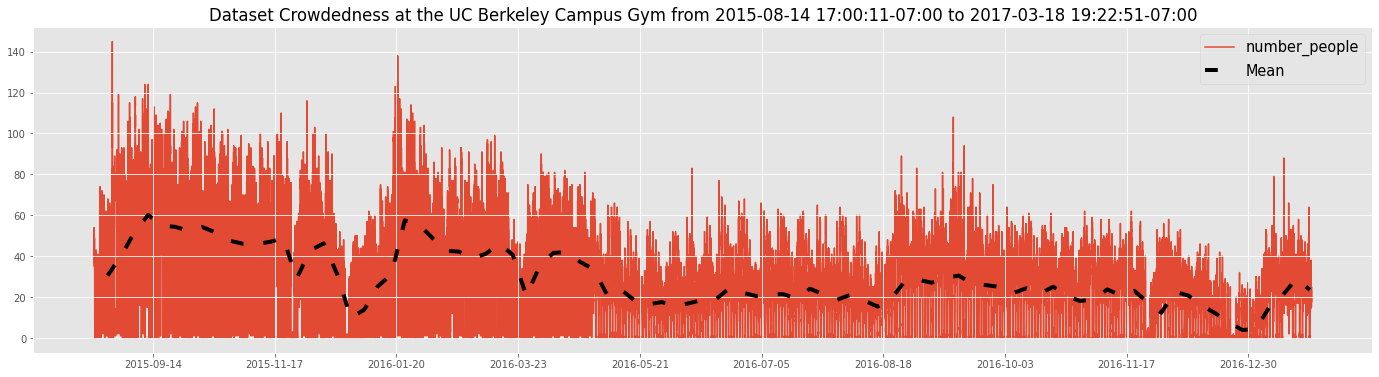

In [ ]:
# Choose plt style
plt.style.use('ggplot')

# Plotting the Data
size = len(df)-1

# Define the plot size
plt.figure(figsize=(24,6))

# Plot the data
# Plot the main signal (time, number_people)
plt.plot(df.index[:size], df['number_people'][:size], label = "number_people", zorder=0)
plt.plot(df.index[x_means], y_means, label = "Mean", linestyle = (0, (3.2,5)), color='black', lw=4)
plt.legend(loc='best', fontsize=14.5)
plt.title(f"Dataset Crowdedness at the UC Berkeley Campus Gym from {df.index[0]} to {df.index[size]}", fontsize=16.5)
#plt.xaxis(df.index[x_means])
plt.xticks(x_axis, x_axis_tick_values)
plt.show()

> Dataset includes 62_184 rows. So let's first take a look of its behavior for the first 10_000 values.

* Small Sample of 10_000 values : 

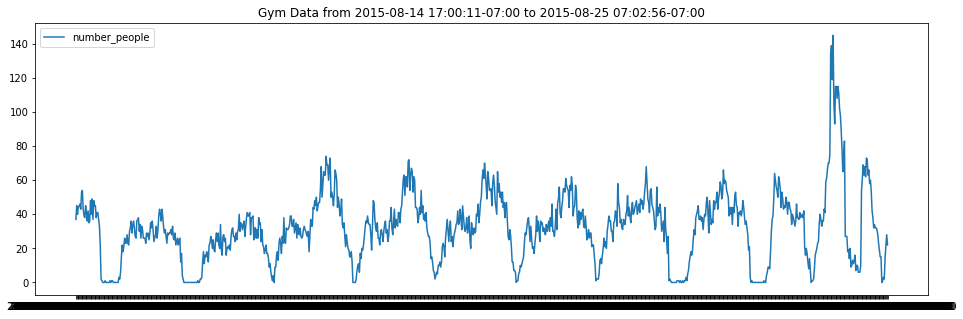

By observing the plot , it seems like there might be some seasonality , but there is a differincing in the trend across the time axis. 

Let's now take a look in the figure that the whole dataset is plotted : 

* All values : 

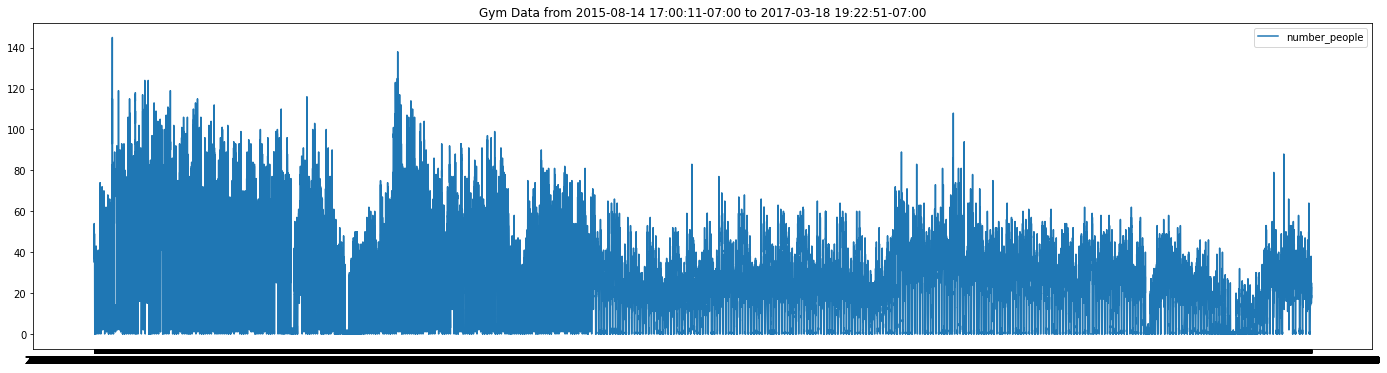

It now becomes more discreet that there is no constant trend and seasonality in the signal. It appears more like it belongs to **Difference Stationary** ,category where the signal is better expressed by the equation : 

* 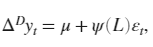

* Where: 
  * 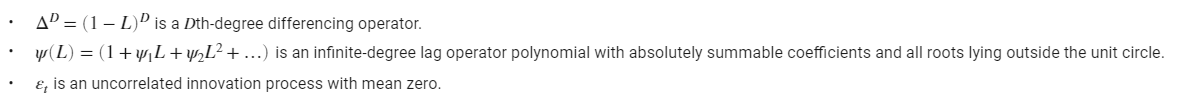

> *Note:* Time series that can be made stationary by differencing are called integrated processes. Specifically, when D differences are required to make a series stationary, that series is said to be integrated of order D, denoted I(D). Processes with D ≥ 1 are often said to have a unit root.

> https://www.mathworks.com/help/econ/trend-stationary-vs-difference-stationary.html

 

## Check the means and variances across different periods 

The main purpose of splitting the dataset in half and calculating the mean and variance for its half is to observe if the mean and variance values diverge between the 2 splits. 

In [ ]:
# Splitting the dataset values in half and comparing means and variances of each half 
X = df['number_people'].values
split = int(len(X) / 2) 
print(split)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

31092
mean1=37.467741, mean2=20.677345
variance1=626.693254, variance2=261.915255


In [ ]:
# Let's calculate the max value of the number_people field so we can estimate how significant the difference between mean1 and mean2 is. 
max = max(X)

# Calculate the percentage between them 
perc = abs(mean1-mean2)/max 

print(f'Percentage: {perc*100}%')

Percentage: 11.579583616142525%


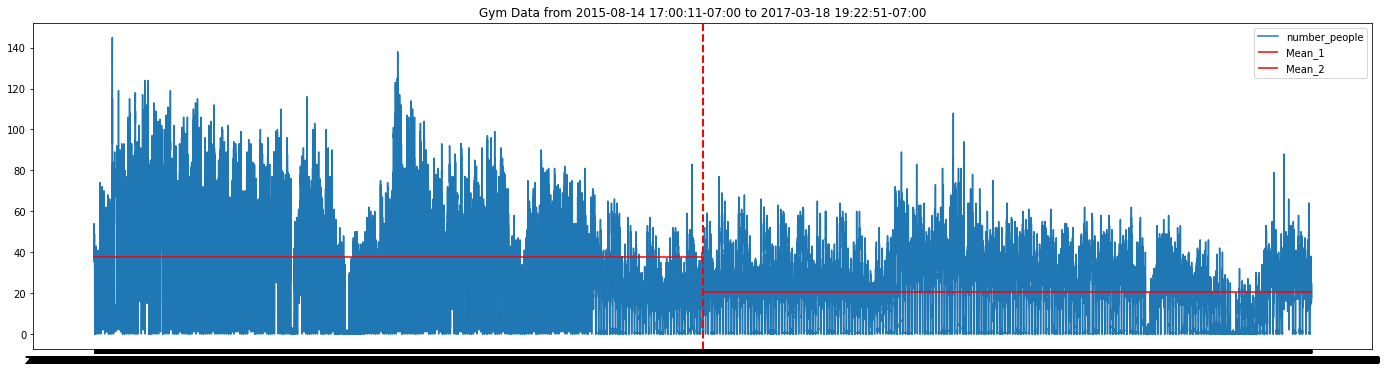

# ADF Test 

In [ ]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test
#series = df.loc[:, 'number_people'].values
adf_test(df['number_people'].values)

Results of Dickey-Fuller Test:
Test Statistic                   -20.252952
p-value                            0.000000
#Lags Used                        60.000000
Number of Observations Used    62123.000000
Critical Value (1%)               -3.430455
Critical Value (5%)               -2.861587
Critical Value (10%)              -2.566795
dtype: float64


# KPSS Function 
https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

In [ ]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

series = df.loc[:, 'number_people'].values
kpss_test(series)

KPSS Statistic: 1.7340652987486667
p-value: 0.01
num lags: 60
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


# **Differencing between KPSS and ADF results**

KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

> https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html